# Instructions

### Objective: acquire an audio that is currently playing and decode it to the corresponding number in the DTMF keyboard (from 0 to 9).

1º Step: after declaring the standard params, calculate the amount of samples that be acquired during the recording. You must use the sampling rate and the recording duration for that.

2º Step: print a warning message informing the recording will start in `n` seconds, then use a `time.sleep` to wait that amount of time.

3º Step: 

4º Step: 

Obs1: 

Obs2: 

In [9]:
from suaBibSignal import *
import peakutils # possible turn-arounds: ```from detect_peaks import *``` or ```import pickle```
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import time

In [10]:
print('Starting decoder\nGenerating base tones')
signal = signalMeu() # makes an instance of the class used to generate the signal
sd.default.samplerate = 1 # default sampling rate (Hz)
sd.default.channels = 2 # tipically the sound boards are 2 channeled (when recording, it will return two lists). If doenst work, try with 1
duration = 10 # a little longer than the time that the signal is being played
frequency_table = [[941, 1336],[697, 1209],[697, 1336],[697, 1477],[770, 1209],[770, 1336],[770, 1477],[852, 1209],[852, 1336],[852, 1477]] # list of corresponding frequencies for each number in DMTF table
sampling_rate = 44100 # true sampling rate (Hz)
samples_amount = duration * sampling_rate # number of samples to be recorded

Starting decoder
Generating base tones


In [11]:
time2prepare = 2 # time to prepare the recording
print(f'Starting recording in {time2prepare} seconds')
time.sleep(time2prepare)
print('Recording...')
audio = sd.rec(samples_amount, sampling_rate, channels=1) # records the audio
sd.wait() # waits for the recording to finish
print("...Recording finished")

Starting recording in 2 seconds
Recording...
...Recording finished


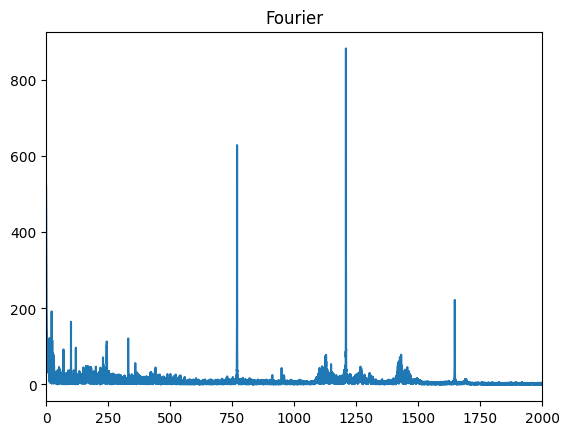

index de picos [   18   223  7700 12090 16480]
frequencias de pico [   1.80000816   22.30010113  770.00349208 1209.00548302 1648.00747396]


In [12]:
y = audio[:, 0] # extracts the audio data from the audio variable

## Calcule e plote o Fourier do sinal audio. como saida tem-se a amplitude e as frequencias
signal.plotFFT(y, sampling_rate)
plt.xlim(0, 2000)
plt.show()


# use a funcao linspace e crie o vetor tempo. Um instante correspondente a cada amostra
# plot do áudio gravado (dados) vs tempo! Não plote todos os pontos, pois verá apenas uma mancha (freq altas) . 



xf, yf = signal.calcFFT(y, sampling_rate)
#agora, voce tem os picos da transformada, que te informam quais sao as frequencias mais presentes no sinal. Alguns dos picos devem ser correspondentes às frequencias do DTMF!
#Para descobrir a tecla pressionada, voce deve extrair os picos e compara-los à tabela DTMF
#Provavelmente, se tudo deu certo, 2 picos serao PRÓXIMOS aos valores da tabela. Os demais serão picos de ruídos.

# para extrair os picos, voce deve utilizar a funcao peakutils.indexes(,,)
# Essa funcao possui como argumentos dois parâmetros importantes: "thres" e "min_dist".
# "thres" determina a sensibilidade da funcao, ou seja, quao elevado tem que ser o valor do pico para de fato ser considerado um pico
#"min_dist" é relatico tolerancia. Ele determina quao próximos 2 picos identificados podem estar, ou seja, se a funcao indentificar um pico na posicao 200, por exemplo, só identificara outro a partir do 200+min_dis. Isso evita que varios picos sejam identificados em torno do 200, uma vez que todos sejam provavelmente resultado de pequenas variações de uma unica frequencia a ser identificada.   
# Comece com os valores:
index = peakutils.indexes(yf, thres=0.2, min_dist=150)
print("index de picos {}" .format(index)) #yf é o resultado da transformada de fourier
#printe os picos encontrados! 
print("frequencias de pico {}" .format(xf[index])) #xf é o vetor das frequencias


In [14]:
peak_frequencies = xf[index]

error_list = []
true_peak_frequencies = []

for peak in peak_frequencies:
    for frequency_duo in frequency_table:
        for frequency in frequency_duo:
            if peak >= frequency - 1 and peak <= frequency + 1:
                if frequency not in true_peak_frequencies:
                    error_list.append(abs(peak - frequency))
                    true_peak_frequencies.append(frequency)

key_pressed = frequency_table.index(true_peak_frequencies)
print(f'Erro: {error_list}')
print(f'Pressed key: {key_pressed}')

Erro: [0.0034920793291348673, 0.005483018063614509]
Pressed key: 4
